Взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)

Сделать обзорный анализ выбранного датасета

Обучить любой классификатор (какой вам нравится)

разобраться с SHAP и построить важности признаков для:

всего тестового набора данных (summary_plot - дать интерпретацию)

для 5 случайных объектов из тестового набора

https://archive-beta.ics.uci.edu/ml/datasets/adult

In [87]:
import pandas as pd
import numpy as np
colnames=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
          'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
df = pd.read_csv("adult.data", names=colnames, header=None)
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [88]:
import matplotlib
import matplotlib.pyplot as plt

In [89]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [90]:
df['education'].value_counts().count()

16

In [91]:
df['education-num'].value_counts().count()

16

In [92]:
df = df.drop(columns='education')

In [93]:
df.head(3)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


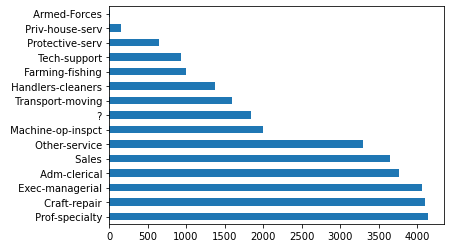

In [94]:
df['occupation'].value_counts().plot.barh();

{0: ' ?', 1: ' Adm-clerical', 2: ' Armed-Forces', 3: ' Craft-repair', 4: ' Exec-managerial', 5: ' Farming-fishing', 6: ' Handlers-cleaners', 7: ' Machine-op-inspct', 8: ' Other-service', 9: ' Priv-house-serv', 10: ' Prof-specialty', 11: ' Protective-serv', 12: ' Sales', 13: ' Tech-support', 14: ' Transport-moving'}


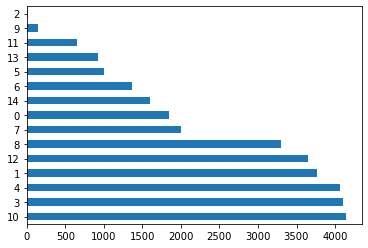

In [95]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(df['occupation']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [96]:
df_col = df.drop(columns='class')

In [97]:
categorical_columns = df_col.columns[df_col.dtypes == 'object'].union(['occupation'])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    print(dict(enumerate(label_encoder.classes_)))
df.head()

{0: ' Divorced', 1: ' Married-AF-spouse', 2: ' Married-civ-spouse', 3: ' Married-spouse-absent', 4: ' Never-married', 5: ' Separated', 6: ' Widowed'}
{0: ' ?', 1: ' Cambodia', 2: ' Canada', 3: ' China', 4: ' Columbia', 5: ' Cuba', 6: ' Dominican-Republic', 7: ' Ecuador', 8: ' El-Salvador', 9: ' England', 10: ' France', 11: ' Germany', 12: ' Greece', 13: ' Guatemala', 14: ' Haiti', 15: ' Holand-Netherlands', 16: ' Honduras', 17: ' Hong', 18: ' Hungary', 19: ' India', 20: ' Iran', 21: ' Ireland', 22: ' Italy', 23: ' Jamaica', 24: ' Japan', 25: ' Laos', 26: ' Mexico', 27: ' Nicaragua', 28: ' Outlying-US(Guam-USVI-etc)', 29: ' Peru', 30: ' Philippines', 31: ' Poland', 32: ' Portugal', 33: ' Puerto-Rico', 34: ' Scotland', 35: ' South', 36: ' Taiwan', 37: ' Thailand', 38: ' Trinadad&Tobago', 39: ' United-States', 40: ' Vietnam', 41: ' Yugoslavia'}
{0: ' ?', 1: ' Adm-clerical', 2: ' Armed-Forces', 3: ' Craft-repair', 4: ' Exec-managerial', 5: ' Farming-fishing', 6: ' Handlers-cleaners', 7: ' 

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,<=50K


In [98]:
df.dtypes

age                int64
workclass          int32
fnlwgt             int64
education-num      int64
marital-status     int32
occupation         int32
relationship       int32
race               int32
sex                int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int32
class             object
dtype: object

In [99]:
df.describe()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866
std,13.640433,1.455960,1.055500e+05,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,1.783560e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


In [100]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [101]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])

In [102]:
df_num_features.columns.tolist()

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [103]:
df['class'].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

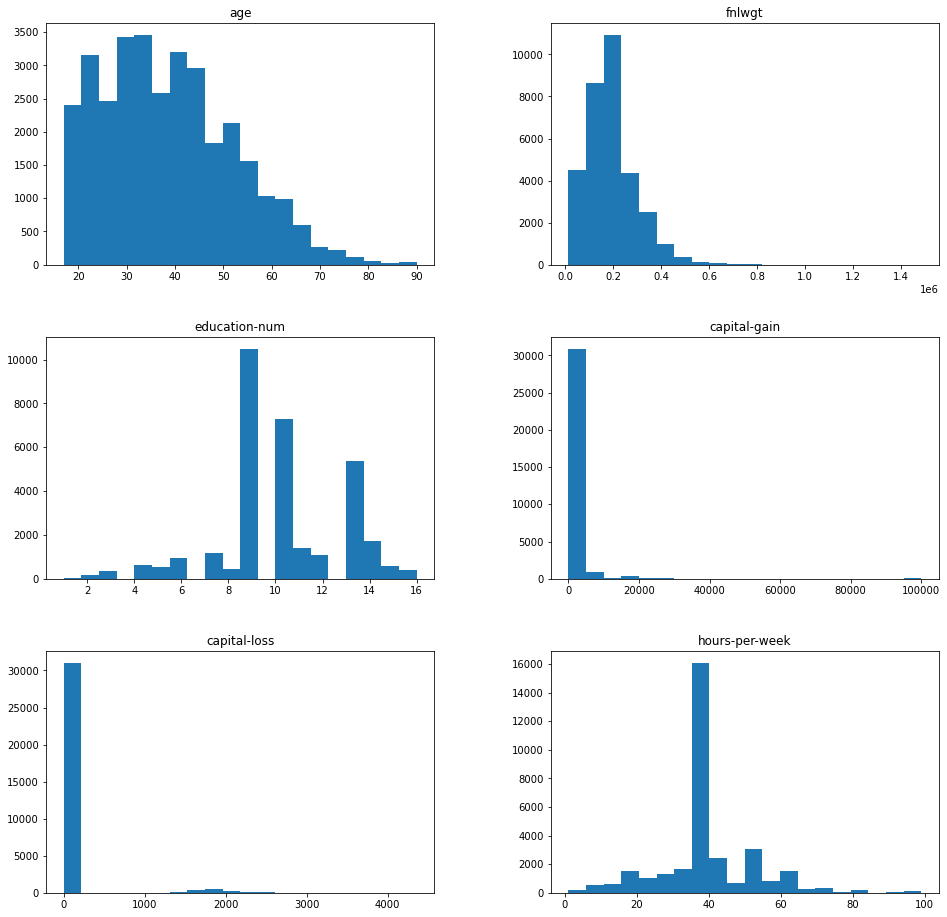

In [104]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

In [105]:
class DataPreprocessing:

    def __init__(self):
        self.medians = None
        self.fnlwgt_quantile = None
        self.capital_gain_quantile = None
        self.capital_loss_quantile = None
        
        
    def fit(self, X):     
        self.medians = X.median()
        self.fnlwgt_quantile = X['fnlwgt'].quantile(.975)
        self.capital_gain_quantile = X['capital-gain'].quantile(.975)
        self.capital_lossn_quantile = X['capital-loss'].quantile(.975)
        
    def transform(self, X):
        # Usage_kWh
        X['fnlwgt_outlier'] = 0
        X.loc[(X['fnlwgt'] > self.fnlwgt_quantile), 'fnlwgt_outlier'] = 1
        X.loc[X['fnlwgt'] > self.fnlwgt_quantile, 'fnlwgt'] = self.medians['fnlwgt']
        
        # CO2(tCO2)
        X['capital-gain_outlier'] = 0
        X.loc[(X['capital-gain'] > self.capital_gain_quantile), 'capital-gain_outlier'] = 1
        X.loc[X['capital-gain'] > self.capital_gain_quantile, 'capital-gain'] = self.medians['capital-gain']
        
        # CO2(tCO2)
        X['capital-loss_outlier'] = 0
        X.loc[(X['capital-loss'] > self.capital_loss_quantile), 'capital-loss_outlier'] = 1
        X.loc[X['capital-loss'] > self.capital_loss_quantile, 'capital-loss'] = self.medians['capital-loss']
        
        return X

In [106]:
df['class']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: class, Length: 32561, dtype: object

{0: ' <=50K', 1: ' >50K'}


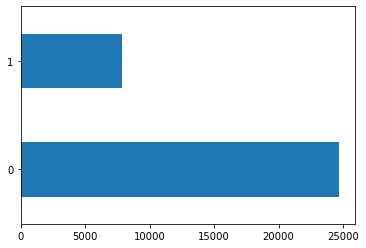

In [107]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(df['class']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [108]:
df['class'] = label_encoder.fit_transform(df['class'])

In [109]:
df['class']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: class, Length: 32561, dtype: int32

In [110]:
preprocessor = DataPreprocessing()
preprocessor.fit(df)

In [111]:
df = preprocessor.transform(df)

In [112]:
df.dtypes

age                       int64
workclass                 int32
fnlwgt                  float64
education-num             int64
marital-status            int32
occupation                int32
relationship              int32
race                      int32
sex                       int32
capital-gain            float64
capital-loss            float64
hours-per-week            int64
native-country            int32
class                     int32
fnlwgt_outlier            int64
capital-gain_outlier      int64
capital-loss_outlier      int64
dtype: object

In [113]:
#!pip install shap

In [114]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
#!pip install lightgbm

In [132]:
features = ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week' ]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['class'], random_state=0)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


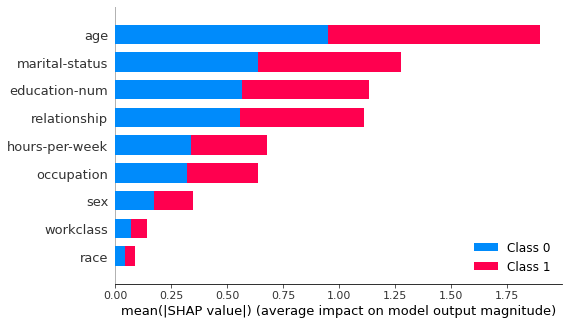

In [134]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=1)
lgb_model.fit(X_train, y_train)

y_preds = lgb_model.predict(X_test)

# строим модель объяснения в SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)

# покажем объяснение
shap.initjs() # для работы в колабе
shap.summary_plot(shap_values, X_test)

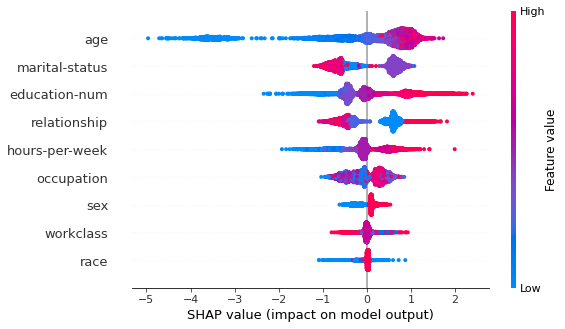

In [135]:
if isinstance(shap_values, list):
    shap_values = shap_values[1]


shap.summary_plot(shap_values, X_test)

Чем меньше возраст человека, тем меньше он зарабатывает.
Вдовцы, разведенные люди зарабатывают меньше, чем люди в браке/отношениях. 
Женщины зарабатывают меньше мужчин. 
Также чем больше человек работает - тем больше у него заработок (что логично).

Про образование и сферу деятлеьности сложно скаазать, но повернхностно можно сдлать вывод, что технические специаотности менее оплачиваемы, чем гуманитарные. 


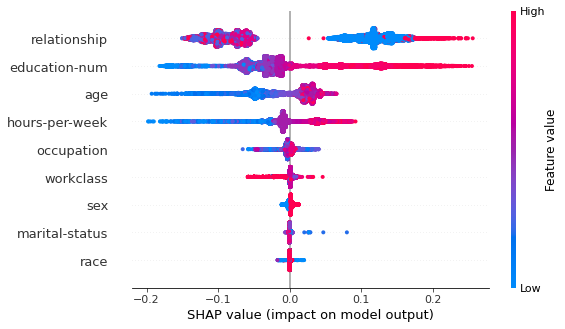

In [137]:
model = xgboost.train({"learning_rate": 0.01, 'random_state': 1}, 
                      xgboost.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values_all = explainer.shap_values(X_train)

shap.summary_plot(shap_values_all, X_train)

Если сомтреть на xgboost, то наиболее восомыми признаками являются статус отношений и образование.
Однако закономерность большего заработка у люедй в браке/отношениях сохраняется.
Закономерности о возрасте и образовании также аналогичны.

In [138]:
# visualize the first prediction's explanation
shap.initjs()
idx = 2
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], X_train.iloc[idx,:])

Данный человек зарабатывает больше денег т.к. у него более зрелый возраст, он в браке и у него лобразование в сфере транпортной системы. 

In [139]:
shap.initjs()
idx = 25
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], X_train.iloc[idx,:])

Данный человек зарабатывает больше денег т.к. у него более зрелый возраст.
Однако образование в сфере обслуживания тянет его заработок вниз. 

In [140]:
shap.initjs()
idx = 100
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], X_train.iloc[idx,:])

Положительно влияют фактор образования (технчиеская поддержка). Однако довольно молодой возраст, отсувие отношения/брака и работа не по профессии оказывают негативное влияние.

In [146]:
shap.initjs()
idx = 24224
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], X_train.iloc[idx,:])

Наличие ребенка, моложой возраст и образование в сфере обслуживания показывают, что данный человек меньше зарабатывает

In [147]:
shap.initjs()
idx = 7676
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], X_train.iloc[idx,:])

Данный человек в барке (муж, что говорит еще о его мужском поле), данный факт споосбсвтует более высокому заработку. Однако молодой возраст и образование оказывают негатвиное влияние

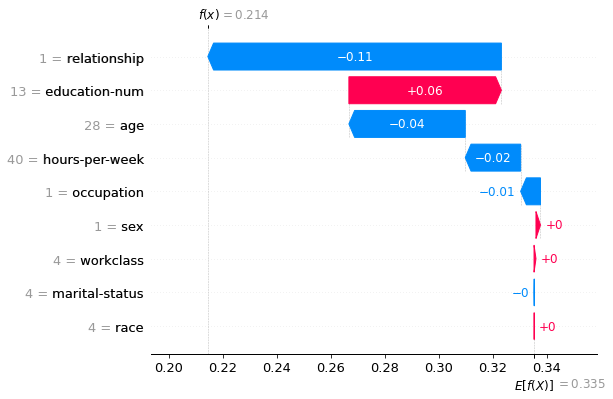

In [141]:
shap_values_one = explainer(X_train.iloc[idx:idx+1])
shap.plots.waterfall(shap_values_one[0])

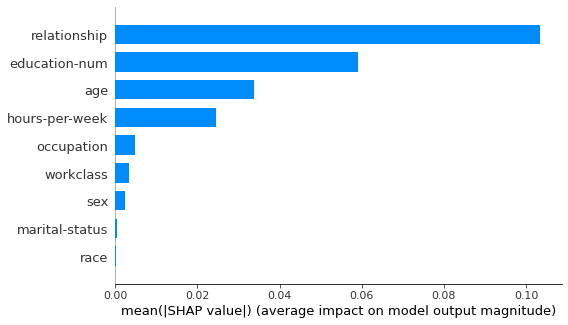

In [142]:
shap.summary_plot(shap_values_all, X_train, plot_type="bar")

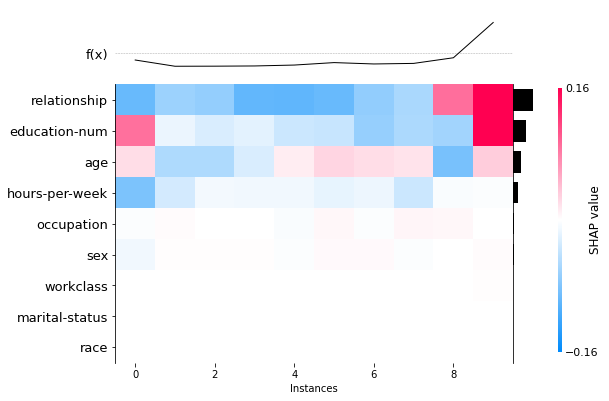

In [143]:
n = 10
shap_values = explainer(X_train.iloc[:n])
shap.plots.heatmap(shap_values)

In [144]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_all[:n], X_train.iloc[:n])

 В целом можно сказать, что наиболее существенные признаки это отношения, образование, кол-во частов работы и возраст.